{0: 1, 89741: 181635784, '316108': [316, 108], '7641': [76, 41], 756: 1530144, 9: 18216, 7832357: 15852690568, '91': [9, 1], 1: 2024, 181635784: 367630826816, 316: 639584, 108: 218592, '76': [7, 6], '41': [4, 1], 1530144: 3097011456, 18216: 36869184, 15852690568: 32085845709632, '2024': [20, 24], '367630826816': [367630, 826816], '639584': [639, 584], '218592': [218, 592], 7: 14168, 6: 12144, 4: 8096, '3097011456': [30970, 11456], '36869184': [3686, 9184], '32085845709632': [3208584, 5709632], '20': [2, 0], '24': [2, 4], '367630': [367, 630], '826816': [826, 816], 639: 1293336, 584: 1182016, 218: 441232, 592: 1198208, 14168: 28676032, 12144: 24579456, '8096': [80, 96], 30970: 62683280, 11456: 23186944, '3686': [36, 86], '9184': [91, 84], 3208584: 6494174016, 5709632: 11556295168, 2: 4048, 367: 742808, 630: 1275120, 826: 1671824, 816: 1651584, 1293336: 2617712064, 1182016: 2392400384, '441232': [441, 232], 1198208: 2425172992, '28676032': [2867, 6032], '24579456': [2457, 9456], '80': [8

<function matplotlib.pyplot.show(close=None, block=None)>

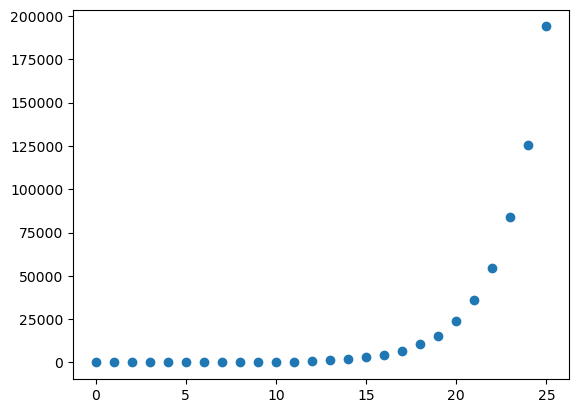

In [2]:
import matplotlib.pyplot as plt

input = '0 89741 316108 7641 756 9 7832357 91'
lst_input = [int(x) for x in input.split()]
len_for_count ={}
dico_cache = {}

def modif_stones(lst, number, count):
    if count < number:
        new_lst = []
        for item in lst:
            if item in dico_cache.keys():
                if isinstance(dico_cache[item], list):
                    new_lst.extend(dico_cache[item])
                else:
                    new_lst.append(dico_cache[item])
            elif item == 0:
                new_lst.append(1)
                dico_cache[item] = 1
            elif len(str(item))%2 == 0:
                item = str(item)
                mid = int(len(item) / 2)
                new_lst.append(int(item[:mid]))
                new_lst.append(int(item[mid:]))
                dico_cache[item] = [int(item[:mid]),int(item[mid:])]
            elif len(str(item))%2 != 0:
                new_lst.append(item*2024)
                dico_cache[item] = item*2024
        count += 1
        len_for_count[count] = len(new_lst)
        return modif_stones(new_lst, number, count)
    else:
        return lst

first = modif_stones(lst_input, 25, 0)
len_for_count[0] = len(lst_input)
print(dico_cache)

plt.scatter(len_for_count.keys(), len_for_count.values())
# plt.yscale('log')
plt.show

In [17]:
input = '0 89741 316108 7641 756 9 7832357 91'
lst_input = [int(x) for x in input.split()]
len_for_count ={}
dico_cache = {}

def modif_stones2(lst, number, count):
    while count < number:
        print(count)
        if count == 0:
            for item in lst_input:
                if item in dico_cache.keys():
                    pass
                elif item == 0:
                    dico_cache[item] = 1
                elif len(str(item))%2 == 0:
                    item = str(item)
                    mid = int(len(item) / 2)
                    dico_cache[item] = [int(item[:mid]),int(item[mid:])]
                elif len(str(item))%2 != 0:
                    dico_cache[item] = item*2024
        else:
            for item in dico_cache.copy().values():
                if item in dico_cache.keys():
                    pass
                elif item == 0:
                    dico_cache[item] = 1
                elif len(str(item))%2 == 0:
                    item = str(item)
                    mid = int(len(item) / 2)
                    dico_cache[item] = [int(item[:mid]),int(item[mid:])]
                elif len(str(item))%2 != 0:
                    dico_cache[item] = item*2024
        count += 1



In [18]:
modif_stones2(lst_input, 75, 0)

0
1


TypeError: unhashable type: 'list'